grade: 5/5, great work!
# Further investigation of weather effects on bicycle ridership

Last week, we saw that the number of cyclists crossing the Fremont Bridge may be affected by some weather events, such as temperature or wind speed.  Management was intrigued by this possibility, and has asked for a more in-depth investigation of the weather effects, using Pronto's full dataset for 2015.  Of particular interest was the idea of differentiating the analysis between weekdays and weekends, since this might normalize each sub-analysis to its own scale and thus more clearly divulge any trends.  Further, management is interested in how these weather effects might be more or less strong in certain of the cycle share's demographics.  That information will be of particular use to the advertising department.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact
import pronto_utils

## Day of week separation in scatter plot correlations

Now that we have all of the packages we need, let's use the pronto_utils file to grab some data.  In the process, we'll average the trip durations across every day in the dataset and then pair the results with all of that day's weather data.  This daily-average trip duration will be our main marker for ridership, and that is what we'll try to correlate to weather patterns.

In [2]:
jdata = pronto_utils.get_tripdurations_and_weather()

open_data_year_one.zip already exists
open_data_year_one.zip already exists


One of the driving factors for this analysis was the revelation last week that ridership can be quite different on weekdays than on weekends.  Let's see if there's a difference in average Pronto trip durations across the week (0 is Monday; 6 is Sunday):

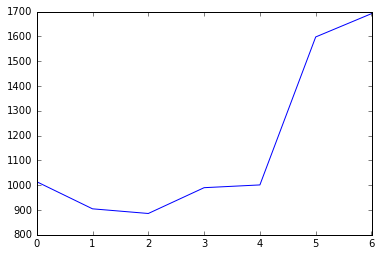

In [3]:
jdata.groupby(pd.DatetimeIndex(jdata.index).dayofweek)['tripduration'].mean().plot()

There's definitely a spike in trip durations on the weekends, so we'd better account for this difference in an interactive plot.

Below is a way to make scatter plots, just as we did in HW2, but with some interactive features that improve not only usability, but data clarity (in that we can now differentiate plots by day of the week).  The slider changes the day, and we can also show only the days with rain or without rain, using the checkbox.  Finally, we can easily swap out the x-axis to one of several weather markers that I've selected as the most potentially interesting.  Each scatter point is one day within the dataset, and, as mentioned above, the "tripduration" number is the average trip duration for that day in seconds.

In [4]:
def plot_weekly_data(DayOfWeek, Rain, Xaxis):
    if Rain==True:
        rdata = jdata[jdata.Events == 'Rain']
        rddata = rdata[pd.DatetimeIndex(rdata.index).dayofweek==DayOfWeek]
        rddata.plot.scatter(Xaxis,'tripduration')
    else:
        nrdata = jdata[jdata.Events != 'Rain']
        nrddata = nrdata[pd.DatetimeIndex(nrdata.index).dayofweek==DayOfWeek]
        nrddata.plot.scatter(Xaxis,'tripduration')

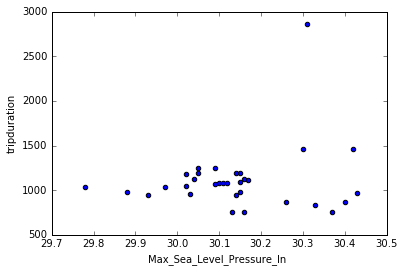

In [5]:
interact(plot_weekly_data, DayOfWeek=(0,6), Rain=False, Xaxis=['Max_Wind_Speed_MPH ','Min_TemperatureF','Min_Visibility_Miles ','Max_Sea_Level_Pressure_In '])

The main question at hand here is: which weather markers give the strongest correlation to our marker of ridership?

According to the scatter plots, the marker with the strongest correlation out of the candidates I've selected appears to actually be minimum visibility--but, as suspected, this (and the other correlations) depends strongly on other factors: the positive correlation with minimum visibility is only present (and indeed only relevant) on rainy days, and it seems to not be present on Sundays or, oddly, Tuesdays.

A few of days of the week (Tuesday, Wednesday, Friday) also appear to have weak correlations between minimum temperature and trip duration, though which days have the correlation seems to depend on whether there was rain--this casts a bit of doubt on how real those correlations are.

Finally, as somewhat of a negative control, I included barometric pressure as a weather marker, which we wouldn't really expect to have any correlation with trip duration (except perhaps indirectly and very weakly).

## Weather effects on demographic subcategories over time

Next, we need to see how the ridership can be split in order to make more sense of weather correlations.  We can split the overall ridership into annual members and short-term pass holders, and split annual members further into gender and birthyear.  I've decided to change birthyear into two discrete bins with a cutoff at the beginning of 1984 in order to better interact with the data.  The idea here is to co-plot a few key weather markers with daily ride totals--able to be split into the demographic subcategories--across *every day of the 2014-2015 dataset*.  Graphing with weather markers and over time in this plot will allow the advertising and pricing departments to adjust their work accordingly: for example, if short-term pass holder sales drop off by a significant amount during Seattle's rainy winter, then we might want to reduce the price of those passes in future winters.

Below is a quick histogram I used to inform the creation of age groups.  As a rough estimate, if we split the birthyears at the beginning of 1984, we'll get about half of the trips in each group.  Plus, George Orwell would approve of that year.

open_data_year_one.zip already exists


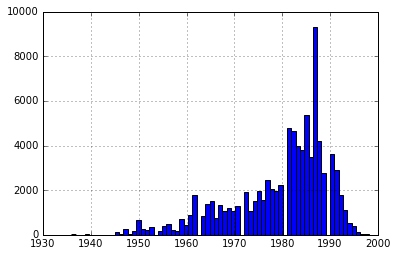

In [7]:
trips = pronto_utils.get_trip_data()
trips.birthyear.hist(bins=70)

To generate the trip-totals-and-weather-over-time graph, let's first use pronto_utils to create the spreadsheet of demographic and weather data.  This is a date-indexed sheet containing, for each day, the *total number of rides* broken down by pass type and by gender and age group for annual members (this generates copy warnings when creating the subcategories, but still works).  The sheet also matches data for our weather markers (inches of precipitation, minimum visibility, and maximum wind speed) to each date.

In [6]:
jdemos = pronto_utils.get_demographic_data()

open_data_year_one.zip already exists
open_data_year_one.zip

pronto_utils.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  trips_before1984['Before 1984'] = trips_before1984['birthyear']
pronto_utils.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  trips_after1984['During or after 1984'] = trips_after1984['birthyear']
pronto_utils.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

 already exists


pronto_utils.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ftrips_after1984['Female During or after 1984'] = ftrips_after1984['birthyear']
pronto_utils.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  otrips_after1984['Other During or after 1984'] = otrips_after1984['birthyear']


So our plan to make this plot is to co-plot ride totals (with interactive tools to bring up demographic subcategories) with weather markers.  The first problem with that idea is that not only will that many lines get messy, but the y-axes will be all mismatched due to the different units.  We'd better make a few adjacent plots that can use different y-axes to fit all of these variables comfortably: precipitation must be on its own graph, while wind speed and visibility can likely be co-plotted, with the understanding that the y-axis units are MPH for wind speed and miles for visibility.  Similarly, we can co-plot separate lines for annual member rides and short-term pass holder rides, but remember that as the annual member rides are divided into the demographic subcategories, the numbers will get smaller, and may become hard to see when still co-plotted with short-term pass holder rides (for which there are no demographic data, and therefore no subcategories).  So we'd better include a checkbox to temporarily take short-term pass holder rides off of the graph.

We saw last week and in the above analysis this week that weekday vs. weekend can have a profound impact on ridership, and this can throw off any other correlations we're trying to make.  Let's quickly see if we need to worry about that with total rides as our ridership marker:

In [23]:
def plot_weekday_rides(RiderType):
    jdemos.groupby(pd.DatetimeIndex(jdemos.index).dayofweek)[RiderType].mean().plot()

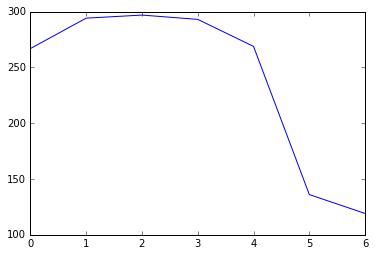

In [25]:
interact(plot_weekday_rides, RiderType=['Annual Member','Short-Term Pass Holder'])

It looks like there is a significant difference that we'll have to worry about, and interestingly, it's the opposite difference for the two passholder types.  We'd better include a checkbox to reversibly exclude weekends from the dates graphed.

In [21]:
def plot_demographics(IncludeShortTermPassHolders, ExcludeWeekends, Gender, Birthyear):
    fig, ax = plt.subplots(3, figsize=(16,8), sharex=True)
    if ExcludeWeekends==True:
        jdemos2 = jdemos[jdemos.index.dayofweek<=4]
        if IncludeShortTermPassHolders==True:
            jdemos2['Short-Term Pass Holder'].plot(ax=ax[0], title='Number of rides per day by membership type', legend=True)
        if Birthyear=='All':
            jdemos2[Gender].plot(ax=ax[0], title='Number of rides per day by membership type', legend=True)
        if Birthyear!='All':
            if Gender!='All Annual Members':
                jdemos2[Gender+' '+Birthyear].plot(ax=ax[0], title='Number of rides per day by membership type', legend=True)
            else:
                jdemos2[Birthyear].plot(ax=ax[0], title='Number of rides per day by membership type', legend=True)
        jdemos2['Precipitation_In '].plot(ax=ax[1], title='Precipitation')
        jdemos2['Min_Visibility_Miles '].plot(ax=ax[2], title='Wind and visibility', legend=True)
        jdemos2['Max_Wind_Speed_MPH '].plot(ax=ax[2], title='Wind and visibility', legend=True)
    else:
        if IncludeShortTermPassHolders==True:
            jdemos['Short-Term Pass Holder'].plot(ax=ax[0], title='Number of rides per day by membership type', legend=True)
        if Birthyear=='All':
            jdemos[Gender].plot(ax=ax[0], title='Number of rides per day by membership type', legend=True)
        if Birthyear!='All':
            if Gender!='All Annual Members':
                jdemos[Gender+' '+Birthyear].plot(ax=ax[0], title='Number of rides per day by membership type', legend=True)
            else:
                jdemos[Birthyear].plot(ax=ax[0], title='Number of rides per day by membership type', legend=True)
        jdemos['Precipitation_In '].plot(ax=ax[1], title='Precipitation')
        jdemos['Min_Visibility_Miles '].plot(ax=ax[2], title='Wind and visibility', legend=True)
        jdemos['Max_Wind_Speed_MPH '].plot(ax=ax[2], title='Wind and visibility', legend=True)

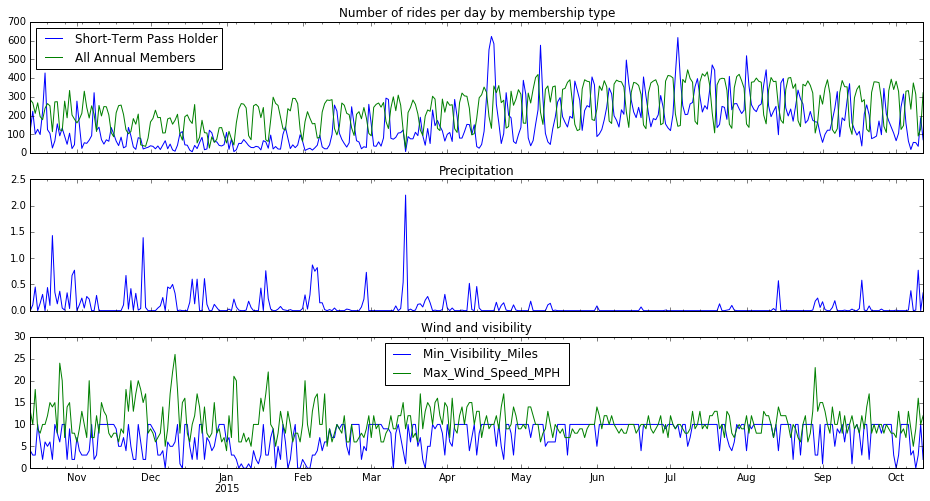

In [22]:
interact(plot_demographics, IncludeShortTermPassHolders=True, ExcludeWeekends=False, Gender=['All Annual Members','Male','Female','Other'], Birthyear=['All','Before 1984','During or after 1984'])

It looks like ridership does increase, especially for short-term pass holders, during the dry summer months, so we should let the pricing department know.  The difference is not as great for annual members, who presumably are doing more (season-independent) commuting.  Regarding the main question of how weather plays a role in ridership, we can look at how peaks in precipitation and wind speed and valleys in visibility correspond to valleys in ridership: there are certainly a few rainy days that pop out as having an impact on the number of rides for the day, including one in mid-October 2014, one in late November 2014, and mid-August 2015, among others.  These rainy days appear to affect both pass holder types, except the ones in the dead of winter, when short-term pass holder rides are already low.  Some of the rainy days seem to affect male ridership more than female, while some seem to have the opposite effect, casting doubt on any gender-dependent aversion to riding in the rain.  The rainy days do, however, seem to have more of an effect on annual members born before 1984 than those born during or after 1984.  This may be due to the older riders, who are probably more established, having more access to alternative transportation for commuting.

Precipitation seems to be the main factor affecting the number of riders who choose to go out on a given day: there are plenty of low-visibility days that don't seem to have a significant effect on ridership, and I can detect no significant wind speed effects on ridership at all.  This is in contrast to the scatter plot analysis above, so the next step in that analysis would be to include a total rides column for each day in jdata, and have an interactive dropdown menu to change the y-axis between tripduration and total rides.  This would be an easy change, but I'll leave it for after the conclusion of this HW.

In conclusion from this second interactive graph, we should argue for lower short-term pass prices in the winter, and maybe implement some sort of bonus program for annual members to reward riding on the rainiest of days (something to make riding in the rain more palatable than taking the bus or car).

# Use of IPython notebook features

As we the students continue to make increasingly complicated operations in our notebooks, concurrent increases in efficiency become important.  The day of lecture unveiling a great number of efficiency-boosting commands was quite helpful in this.  In this notebook, I haven't used any magic commands beyond the usual %matplotlib inline, and I didn't use any shell commands either, but a huge increase in efficiency I did make use of, one that doesn't show in the final notebook product, is the collection of keyboard shortcuts in both command mode and edit mode.  I spent way too much time in the first two HWs fiddling with the dropdown menus to make markdown cells, add new cells, etc., and the percentage of my time on this HW spent on those operations has dropped to almost zero.  Combining that with some strategic use of copy-paste, and the use of a separate "worksheet" notebook (which of course is a complete mess and is not included in the HW submission), boosted my efficiency to the point where, though I'm still a noob, I have enough time to spend on fiddling with code and thinking about logic that I can end up making, in my opinion, some pretty cool plots.  This is almost entirely due to the shortcut list accessed by hitting 'h' in command mode, and I think (until I achieve muscle memory of all of the shortcuts) it would be worthwhile to print out that list for reference.  The help functionality and tooltips were useful as well in a limited sense, but I think I learn better by looking at multiple examples, so I ended up more often using previous lecture notes/HWs and StackExchange to properly implement functions.